In [2]:
# ! unzip '/content/drive/MyDrive/wild-edible-plants.zip'


In [7]:
# ! unzip '/content/drive/MyDrive/wi3ld-edible-plants.zip' -d '/content/drive/MyDrive/Project'

# !pip install opencv-python
# !pip install opencv-python-headless




In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle



In [2]:
# data_dir='D:\\proj\\DB\\dataset\\resized'
data_dir='D:\\3rd Year Mini Project\\Implementation\\dataset\\dataset\\resized'
# data_dir='D:\\3rd Year Mini Project\\Implementation\\dataset\\datasets\\dataset'

# D:\proj\DB\dataset\resized


In [4]:
categories=['alfalfa',
'allium',
'borage',
'burdock',
'calendula',
'cattail',
'chickweed',
'chicory',
'chive_blossom',
'coltsfoot',
'common_mallow',
'common_milkweed',
'common_vetch',
'common_yarrow',
'coneflower',
'cow_parsley',
'cowslip',
'crimson_clover',
'crithmum_maritimum',
'daisy',
'dandelion',
'fennel',
'fireweed',
'gardenia',
'garlic_mustard',
'geranium',
'ground_ivy',
'harebell',
'henbit',
'knapweed',
'meadowsweet',
'mullein',
'pickerelweed',
'ramsons',
'red_clover']

In [15]:
data=[]


In [16]:
def make_data():
  for i in categories:
    path=os.path.join(data_dir,i)
    label=categories.index(i) 
    for name in os.listdir(path):
      image_path=os.path.join(path,name)
      image=cv2.imread(image_path)
      try:
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image = cv2.resize(image,(224,224))

        image = np.array(image,dtype=np.float32)

        data.append([image,label])

      except Exception as e:
        pass
  print(len(data))

  pik=open('data.pickle','wb')
  pickle.dump(data,pik)
  pik.close()





In [ ]:
make_data()


In [4]:
def load_data():
    pick=open('data.pickle','rb')
    data=pickle.load(pick)
    pick.close()
    np.random.shuffle(data)
    feature=[]
    labels=[]

    for img,label in data:
        feature.append(img)
        labels.append(label)
    
    feature = np.array(feature,dtype=np.float32)
    labels=np.array(labels)

    feature=feature/255.0

    return [feature,labels]
    

In [5]:
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [6]:
(feature, labels)=load_data()


In [24]:
x_train, x_test, y_train, y_test= train_test_split(feature, labels, test_size= 0.1)

In [12]:

input_layer= tf.keras.layers.Input([224,224,3])
conv1 = tf.keras.layers.Conv2D(filters = 32, kernel_size=(5,5),padding='same',activation='relu')(input_layer)
pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv1)

conv2 = tf.keras.layers.Conv2D(filters = 64, kernel_size=(3,3),padding='same',activation='relu')(pool1)
pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2))(conv2)

conv3 = tf.keras.layers.Conv2D(filters = 96, kernel_size=(3,3),padding='same',activation='relu')(pool2)
pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2))(conv3)

conv4 = tf.keras.layers.Conv2D(filters = 96, kernel_size=(3,3),padding='same',activation='relu')(pool3)
pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2))(conv4)

flt1 = tf.keras.layers.Flatten()(pool4)
dn1 = tf.keras.layers.Dense(512, activation='relu')(flt1) 
out = tf.keras.layers.Dense(35, activation='softmax')(dn1)

model = tf.keras.Model(input_layer, out)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, batch_size = 100, epochs =10)
model.save('mymodel.h5')


Epoch 1/10
84/84 [==============================] - 486s 6s/step - loss: 2.8441 - accuracy: 0.2099
Epoch 2/10
84/84 [==============================] - 452s 5s/step - loss: 1.9674 - accuracy: 0.4203
Epoch 3/10
84/84 [==============================] - 445s 5s/step - loss: 1.5575 - accuracy: 0.5325
Epoch 4/10
84/84 [==============================] - 453s 5s/step - loss: 1.1421 - accuracy: 0.6495
Epoch 5/10
84/84 [==============================] - 475s 6s/step - loss: 0.7335 - accuracy: 0.7717
Epoch 6/10
84/84 [==============================] - 443s 5s/step - loss: 0.4162 - accuracy: 0.8710
Epoch 7/10
84/84 [==============================] - 439s 5s/step - loss: 0.2087 - accuracy: 0.9348
Epoch 8/10
84/84 [==============================] - 443s 5s/step - loss: 0.1228 - accuracy: 0.9642
Epoch 9/10
84/84 [==============================] - 435s 5s/step - loss: 0.1083 - accuracy: 0.9705
Epoch 10/10
84/84 [==============================] - 438s 5s/step - loss: 0.0563 - accuracy: 0.9840


In [8]:
x_train, x_test, y_train, y_test= train_test_split(feature, labels, test_size= 0.1)
model = tf.keras.models.load_model('mymodel.h5')
model.evaluate(x_test,y_test,verbose=1)


30/30 [==============================] - 20s 562ms/step - loss: 0.4666 - accuracy: 0.9099


[0.46657752990722656, 0.9098712205886841]

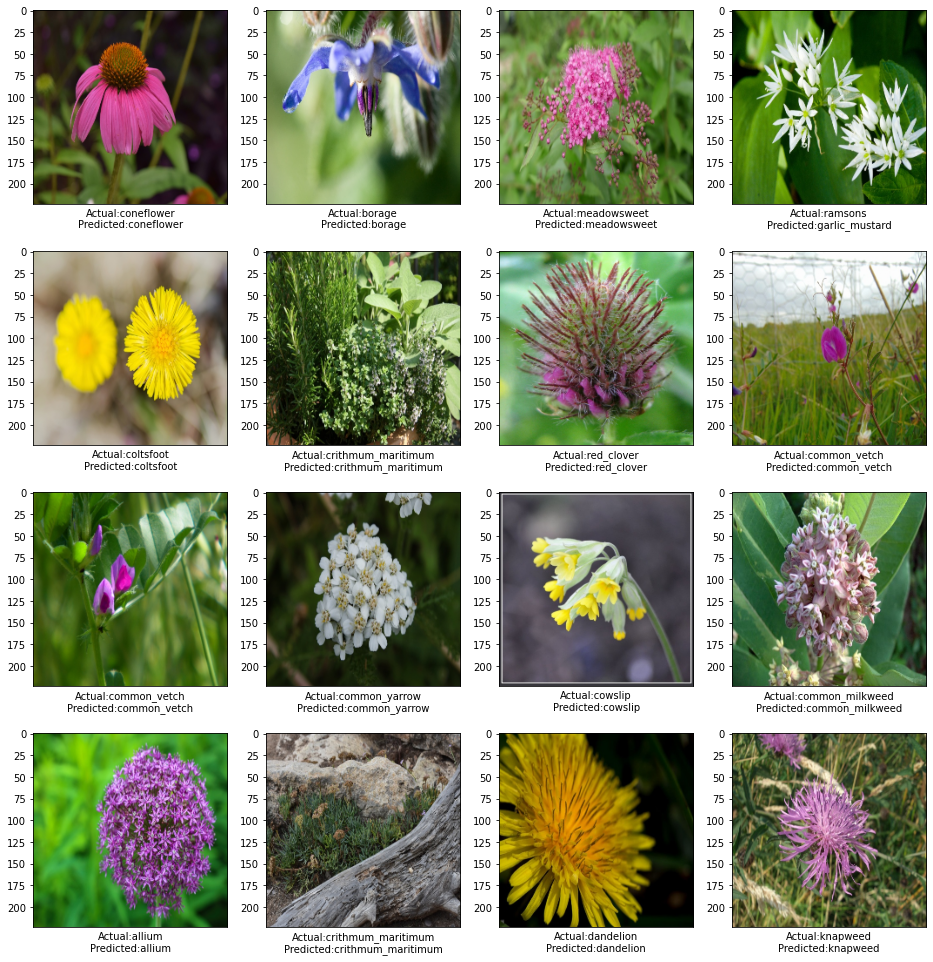

In [11]:
prediction = model.predict(x_test)

plt. figure(figsize=(16,17))

for i in range(16):
	plt.subplot(4,4,i+1) 
	plt.imshow(x_test[i]) 
	plt.xlabel('Actual:'+categories[y_test[i]]+ '\n'+'Predicted:'+
		categories[np.argmax(prediction[i])])
	plt.xticks ([])

plt.show()